<Axes: >

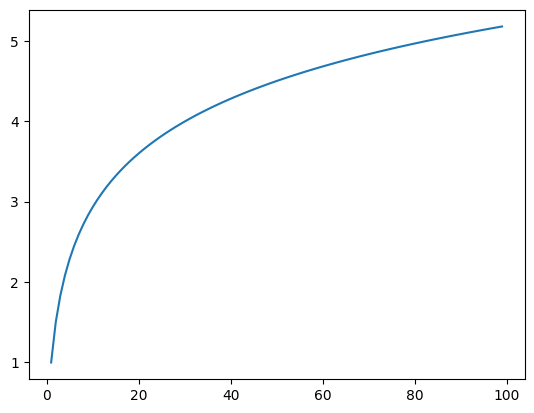

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

anzahl_glieder = np.arange(1, 100)
#print(anzahl_glieder)

harmonische_folge = []

for n in anzahl_glieder:
    m = 1/n
    harmonische_folge.append(m)
    harmonische_reihe = np.cumsum(harmonische_folge)

# print(np.array(harmonische_folge))
# print(np.array(harmonische_reihe))

#plt.plot(anzahl_glieder, harmonische_folge, 'o-', label='Harmonische Folge')
sns.lineplot(x=anzahl_glieder, y=harmonische_reihe)

